In [146]:
%matplotlib inline
from glob import glob
from tqdm import tqdm
import requests
from os import listdir
import json
import pandas as pd
import os.path
import seaborn as sns

In [3]:
meta_path = "/home/jack/datasets/ggtracker/matches_6555_sampled_meta/"

In [118]:
names = listdir(meta_path)
data = []
for name in tqdm(names):
    with open(meta_path+name, "r") as f:
        match_data = json.load(f)
        if len(match_data.get("entities", [])) == 2:
            match_data["game_name"] = name
            match_data["race1"] = match_data["entities"][0]["race"]
            match_data["race2"] = match_data["entities"][1]["race"]
            data.append(match_data)

In [100]:
data[0]["entities"][1]["race"]

'Z'

In [142]:
df_data = pd.DataFrame(data)

In [102]:
df_data.head()

,average_league,category,cobrand,duration_seconds,ended_at,entities,expansion,game_name,game_type,id,map,map_name,map_url,race1,release_string,replays,replays_count,summaries_count,winning_team
0,3.0,Ladder,NaN,912,2013-07-21T21:31:20+00:00,"[{'max_creep_spread': None, 'color': 'B4141E',...",1,3730202.json,1v1,3730202,"{'image_scale': 0.746268656716418, 'id': 1739,...",Neo Planet S LE,https://gg2-mi-dev.s3.amazonaws.com/neo_planet...,Z,2.0.9.26147,"[{'md5': '0d89f4564a2832c6db1568204b738237', '...",1,0,2
1,5.0,Ladder,NaN,1062,2013-04-19T16:52:17+00:00,"[{'max_creep_spread': None, 'color': 'B4141E',...",1,2840202.json,1v1,2840202,"{'image_scale': 0.806451612903226, 'id': 1634,...",Newkirk Precinct,https://gg2-mi-dev.s3.amazonaws.com/newkirk_pr...,P,2.0.7.25293,"[{'md5': '077b724892c023394b1b9d41c90f7945', '...",1,0,2
2,1.0,Public,NaN,1576,2014-08-20T17:06:05+00:00,"[{'max_creep_spread': None, 'color': '1CA7EA',...",1,5358202.json,1v1,5358202,"{'image_scale': 0.694444444444444, 'id': 4855,...",Overgrowth LE,https://gg2-mi-dev.s3.amazonaws.com/overgrowth...,P,2.1.3.30508,"[{'md5': '088fe6d663b49cd59694bd8e2c71f6b6', '...",1,0,2
3,1.0,Ladder,NaN,721,2014-11-11T07:50:42+00:00,"[{'max_creep_spread': None, 'color': 'B4141E',...",1,5584202.json,1v1,5584202,"{'image_scale': 0.704225352112676, 'id': 5578,...",Ohana LE,https://gg2-mi-dev.s3.amazonaws.com/ohana_le.jpg,Z,2.1.6.32540,"[{'md5': 'e5fc31a3445a6a0c8bd463ee1d59b404', '...",1,0,2
4,1.0,Ladder,NaN,10,2016-03-12T00:46:05+00:00,"[{'max_creep_spread': None, 'color': 'B4141E',...",2,6527202.json,1v1,6527202,"{'image_scale': -5.16592012551525e-08, 'id': 7...",Dusk Towers,None,P,3.1.4.41219,"[{'md5': '7f927d84a785988def0c997ee2b2a160', '...",2,0,1


In [153]:
df_data_cleaned = df_data[(df_data["game_type"] == "1v1") & (df_data["category"] == "Ladder")]
wol_games = df_data[df_data["expansion"] == 0]

In [152]:
len(lotv_games) #very little

246

In [154]:
expansion_dict = {0: "wol", 1: "hots", 2: "lotv"}
games = df_data_cleaned.replace({"expansion":expansion_dict})

games.head()

,average_league,category,cobrand,duration_seconds,ended_at,entities,expansion,game_name,game_type,id,map,map_name,map_url,race1,race2,release_string,replays,replays_count,summaries_count,winning_team
0,3.0,Ladder,NaN,912,2013-07-21T21:31:20+00:00,"[{'max_creep_spread': None, 'color': 'B4141E',...",hots,3730202.json,1v1,3730202,"{'image_scale': 0.746268656716418, 'id': 1739,...",Neo Planet S LE,https://gg2-mi-dev.s3.amazonaws.com/neo_planet...,T,Z,2.0.9.26147,"[{'md5': '0d89f4564a2832c6db1568204b738237', '...",1,0,2
1,5.0,Ladder,NaN,1062,2013-04-19T16:52:17+00:00,"[{'max_creep_spread': None, 'color': 'B4141E',...",hots,2840202.json,1v1,2840202,"{'image_scale': 0.806451612903226, 'id': 1634,...",Newkirk Precinct,https://gg2-mi-dev.s3.amazonaws.com/newkirk_pr...,T,P,2.0.7.25293,"[{'md5': '077b724892c023394b1b9d41c90f7945', '...",1,0,2
3,1.0,Ladder,NaN,721,2014-11-11T07:50:42+00:00,"[{'max_creep_spread': None, 'color': 'B4141E',...",hots,5584202.json,1v1,5584202,"{'image_scale': 0.704225352112676, 'id': 5578,...",Ohana LE,https://gg2-mi-dev.s3.amazonaws.com/ohana_le.jpg,P,Z,2.1.6.32540,"[{'md5': 'e5fc31a3445a6a0c8bd463ee1d59b404', '...",1,0,2
4,1.0,Ladder,NaN,10,2016-03-12T00:46:05+00:00,"[{'max_creep_spread': None, 'color': 'B4141E',...",lotv,6527202.json,1v1,6527202,"{'image_scale': -5.16592012551525e-08, 'id': 7...",Dusk Towers,None,Z,P,3.1.4.41219,"[{'md5': '7f927d84a785988def0c997ee2b2a160', '...",2,0,1
5,3.0,Ladder,NaN,1342,2014-10-09T04:59:11+00:00,"[{'max_creep_spread': None, 'color': 'B4141E',...",hots,5498202.json,1v1,5498202,"{'image_scale': 0.694444444444444, 'id': 5440,...",Overgrowth LE,https://gg2-mi-dev.s3.amazonaws.com/overgrowth...,T,Z,2.1.5.32392,"[{'md5': 'd35b66796ef59e7220f65af368210d28', '...",1,0,2


In [158]:
def winners_race(expansion):
    wins_races1 = games[(games["winning_team"] == 1) & (games["expansion"] == expansion)]\
    .groupby("race1")["id"].count()
    wins_races2 = games[(games["winning_team"] == 2) & (games["expansion"] == expansion)]\
    .groupby("race2")["id"].count()
    return ((wins_races1 + wins_races2) / (wins_races1.sum() + wins_races2.sum()) )

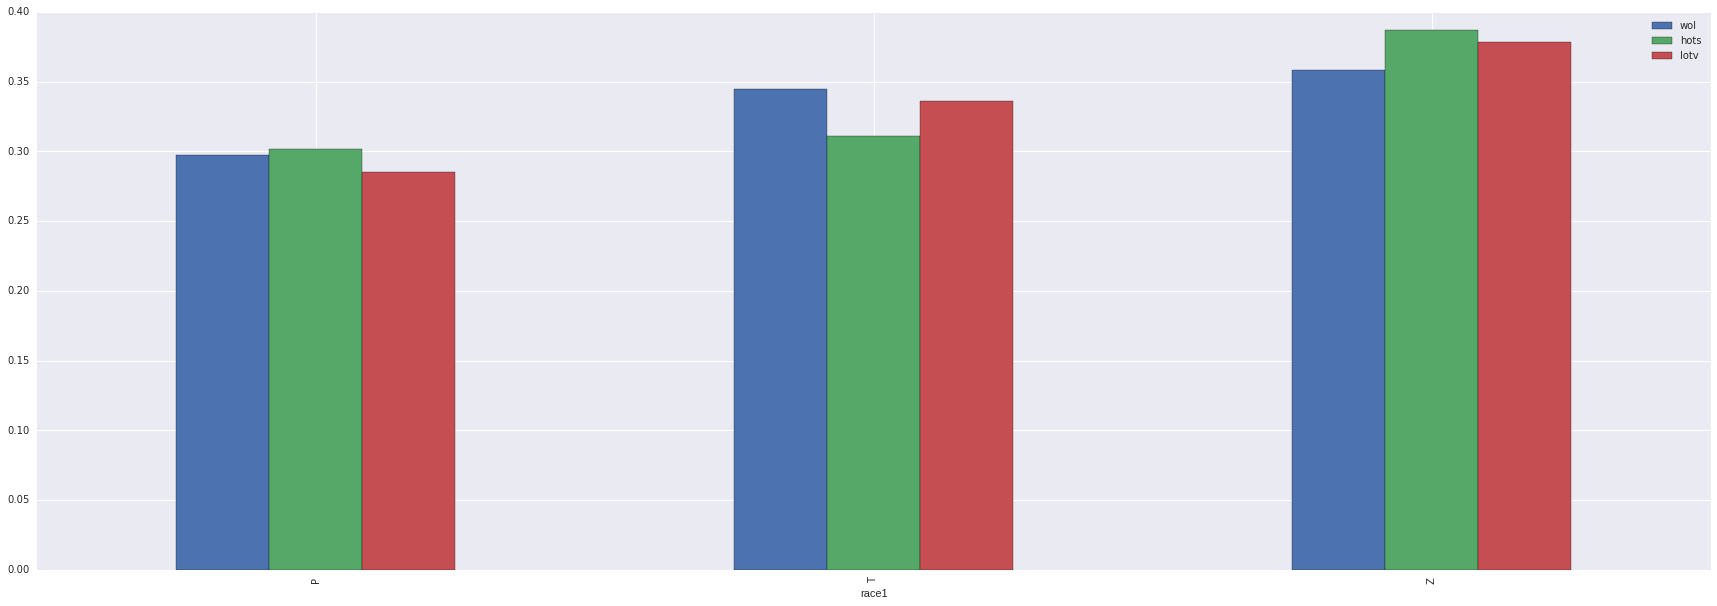

In [176]:
winners = pd.DataFrame()
for e in expansion_dict.values():
    winners[e] = winners_race(e)
winners.plot(kind="bar", layout=(1,3), figsize=(30, 10))

In [107]:
print(wol_games["game_name"])

6        698202.json
10      5558202.json
13      1769202.json
26       543202.json
27       328202.json
41       120202.json
44       310202.json
51      3101202.json
62       129202.json
68      6280202.json
69      1570202.json
72      4072202.json
75       442202.json
79      3215202.json
84      2701202.json
92       437202.json
108     1632202.json
124     3164202.json
129      390202.json
134     4461202.json
136      407202.json
138     5105202.json
139      446202.json
148      468202.json
157      304202.json
168     4083202.json
176     1789202.json
178      376202.json
205     3568202.json
206      331202.json
            ...     
2616     432202.json
2628     314202.json
2630     439202.json
2643     523202.json
2672     373202.json
2683    1612202.json
2685    2760202.json
2691     481202.json
2695     460202.json
2708    1066202.json
2709     374202.json
2714     417202.json
2717    3360202.json
2720     546202.json
2749     365202.json
2750    6206202.json
2778      912